# Numerical Exercise 11

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [62]:
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.5

# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

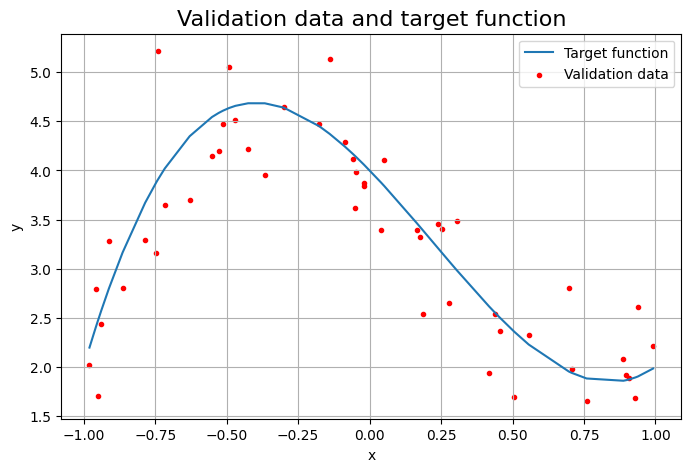

In [63]:
# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (8,5))
plt.plot(x_valid, y_target, label = "Target function")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

In [70]:

models = []
history = []
act = ['relu', 'elu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'exponential']
for i in range(len(act)):
    model = tf.keras.Sequential()
    model.add(Dense(40, input_shape = (1,), activation = act[i]))
    model.add(Dense(20, activation = act[i]))
    model.add(Dense(20, activation = act[i]))
    model.add(Dense(1, activation = act[i]))
    # available optimizers: 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'
    # adam performs the best for this problem, adamw adn nadam curiousely does not perform well
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
    models.append(model)

    history.append(models[i].fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid)))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 12.1515 - mse: 12.1509 - val_loss: 8.7992 - val_mse: 9.8748
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0645 - mse: 10.0693 - val_loss: 5.2240 - val_mse: 5.9670
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2533 - mse: 5.2563 - val_loss: 1.6332 - val_mse: 1.8818
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6652 - mse: 1.6648 - val_loss: 1.3152 - val_mse: 1.5532
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2518 - mse: 1.2524 - val_loss: 1.0172 - val_mse: 1.2116
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0659 - mse: 1.0654 - val_loss: 0.8509 - val_mse: 1.0197
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8689 - mse: 0.8698 - val_loss: 0.6810 - val_mse: 0.8187
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7223 - mse: 0.7223 - val_loss: 0.6215 - val_mse: 0.7431
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5976 - 

In [71]:
for i in range(len(act)):
    print("Model with activation function: {c} , {act}".format(c=i, act=act[i]))
    w = models[i].get_weights()

    score = models[i].evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
    print('Test loss:     ', score[0])
    print('Test accuracy: ', score[1])
    print()

    score = models[i].evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
    print('Test loss exact:     ', score[0])
    print('Test accuracy exact: ', score[1])
    print()


Model with activation function: 0 , relu
Test loss:      0.22666418552398682
Test accuracy:  0.24443374574184418

Test loss exact:      0.020476186648011208
Test accuracy exact:  0.025887345895171165

Model with activation function: 1 , elu
Test loss:      0.21143460273742676
Test accuracy:  0.2192729413509369

Test loss exact:      0.015268122777342796
Test accuracy exact:  0.01673734374344349

Model with activation function: 2 , sigmoid
Test loss:      5.214359283447266
Test accuracy:  6.048013687133789

Test loss exact:      5.420499324798584
Test accuracy exact:  6.377337455749512

Model with activation function: 3 , softmax
Test loss:      5.191481113433838
Test accuracy:  6.02302360534668

Test loss exact:      5.397054672241211
Test accuracy exact:  6.351475715637207

Model with activation function: 4 , softplus
Test loss:      0.4857645630836487
Test accuracy:  0.5089031457901001

Test loss exact:      0.23950019478797913
Test accuracy exact:  0.2609059810638428

Model with act

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


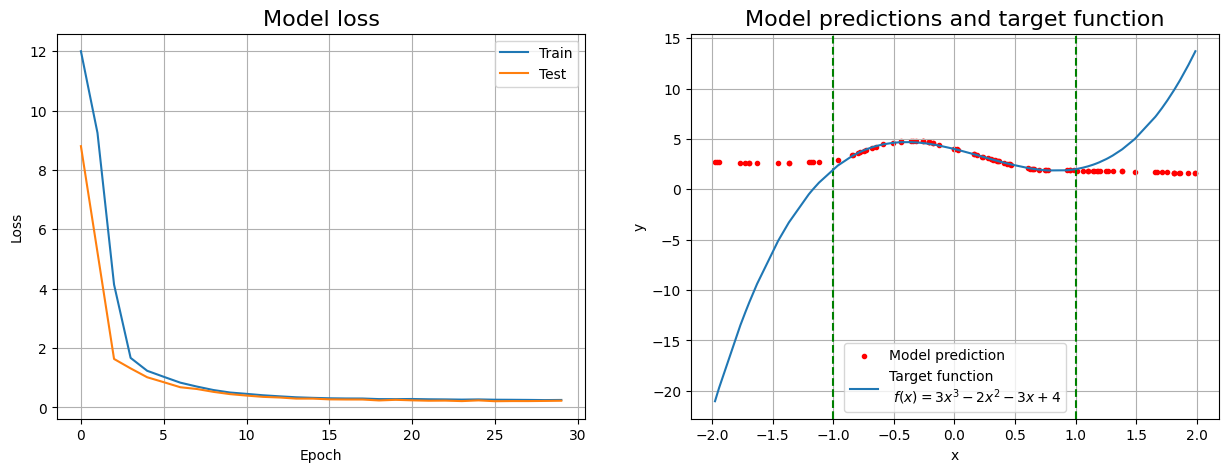

In [72]:
sel = 0

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(history[sel].history['loss'])
plt.plot(history[sel].history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = models[sel].predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()